# Classification

## K-Nearest Neighbor

In [1]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df['target'] = iris.target # or iris_df['target'] = iris['target']
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [2]:
# knn model
from sklearn.neighbors import KNeighborsClassifier
k = 1

# distance
knn_model = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski')
knn_model.fit(X = iris['data'], y = iris['target'])
knn_model.predict(X=[[5.1,3.5,1.4,0.2],[6.7,3.0,5.2,2.3]])

array([0, 2])

In [3]:
# knn model
from sklearn.neighbors import KNeighborsClassifier
k = 1

# distance
knn_model = KNeighborsClassifier(n_neighbors=k, metric = 'mahalanobis', metric_params={'V': iris_df.iloc[:,:-1].corr()})
knn_model.fit(X = iris['data'], y = iris['target'])
knn_model.predict(X=[[5.1,3.5,1.4,0.2],[6.7,3.0,5.2,2.3]])

array([0, 2])

In [4]:
from sklearn.neighbors import KNeighborsClassifier
k = 1

# distance
knn_model = KNeighborsClassifier(n_neighbors=k, metric = 'hamming')
knn_model.fit(X = iris['data'], y = iris['target'])
knn_model.predict(X=[[5.1,3.5,1.4,0.2],[6.7,3.0,5.2,2.3]])

array([0, 2])

In [5]:
from sklearn.neighbors import KNeighborsClassifier
k = 1

# distance
knn_model = KNeighborsClassifier(n_neighbors=k, metric = 'cosine')
knn_model.fit(X = iris['data'], y = iris['target'])
knn_model.predict(X=[[5.1,3.5,1.4,0.2],[6.7,3.0,5.2,2.3]])

array([0, 2])

In [6]:
from sklearn.neighbors import KNeighborsClassifier
k = 1

# distance
knn_model = KNeighborsClassifier(n_neighbors=k, metric = 'jaccard')
knn_model.fit(X = iris['data'], y = iris['target'])
knn_model.predict(X=[[5.1,3.5,1.4,0.2],[6.7,3.0,5.2,2.3]])

array([0, 0])

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import entropy
k = 1

# distance
knn_model = KNeighborsClassifier(n_neighbors=k, metric = entropy)
knn_model.fit(X = iris['data'], y = iris['target'])
knn_model.predict(X=[[5.1,3.5,1.4,0.2],[6.7,3.0,5.2,2.3]])

array([0, 2])

### Cross-Validation to tuning k

In [8]:
from sklearn.model_selection import GridSearchCV

n = 5
k = range(1,10)
metric = ['hamming','minkowski', 'jaccard']
param_grid = {
    "n_neighbors":k,
    "metric": metric
}
knn_model = KNeighborsClassifier()
estimator = GridSearchCV(estimator=knn_model,param_grid=param_grid,cv = n) # default is 5
estimator.fit(X=iris['data'],y = iris['target'])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['hamming', 'minkowski', 'jaccard'],
                         'n_neighbors': range(1, 10)})

In [9]:
estimator.best_params_

{'metric': 'minkowski', 'n_neighbors': 6}

### Bayes and 1NN Error

In [10]:
from sklearn.model_selection import train_test_split
car_df = pd.read_csv('./Car.csv')
Y = car_df['car_acceptability']
X = car_df.iloc[:,:-1]
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3)

In [11]:
car_df['car_acceptability'].unique()

array([1, 0], dtype=int64)

In [12]:
from sklearn.naive_bayes import BernoulliNB
model_knn = KNeighborsClassifier(n_neighbors=1)
model_GNB = BernoulliNB()

model_knn.fit(X = train_x, y = train_y)
model_GNB.fit(X = train_x, y = train_y)



BernoulliNB()

In [13]:
err_knn = 1 - model_knn.score(X = test_x, y = test_y)
err_GNB = 1 - model_GNB.score(X = test_x, y = test_y)
err_knn, err_GNB

(0.09633911368015413, 0.2658959537572254)

## Decision Tree Algorithm

### Preprocess

In [14]:
credit = pd.read_csv('./credit.csv')
credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,skilled employee,1,yes,yes,1
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,skilled employee,1,none,yes,2
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,skilled employee,2,none,yes,1
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,skilled employee,2,none,yes,2


In [15]:
# 因为这里数据很多字符型，所以要先进行数据预处理, 这里利用factorize() function生成数字化标签
credit_feature_label = {}
qualitative_feature_index = [0,2,3,5,6,8,9,11,13,14,16,18,19]
for column in credit.columns[qualitative_feature_index]:
    credit_quantite = credit[column].factorize()
    credit[column] = credit_quantite[0]
    credit_feature_label[column] = dict(zip(credit_quantite[1], range(len(credit_quantite[1]))))

In [16]:
credit_feature_label

{'checking_balance': {'< 0 DM': 0,
  '1 - 200 DM': 1,
  'unknown': 2,
  '> 200 DM': 3},
 'credit_history': {'critical': 0,
  'repaid': 1,
  'delayed': 2,
  'fully repaid': 3,
  'fully repaid this bank': 4},
 'purpose': {'radio/tv': 0,
  'education': 1,
  'furniture': 2,
  'car (new)': 3,
  'car (used)': 4,
  'business': 5,
  'domestic appliances': 6,
  'repairs': 7,
  'others': 8,
  'retraining': 9},
 'savings_balance': {'unknown': 0,
  '< 100 DM': 1,
  '501 - 1000 DM': 2,
  '> 1000 DM': 3,
  '101 - 500 DM': 4},
 'employment_length': {'> 7 yrs': 0,
  '1 - 4 yrs': 1,
  '4 - 7 yrs': 2,
  'unemployed': 3,
  '0 - 1 yrs': 4},
 'personal_status': {'single male': 0,
  'female': 1,
  'divorced male': 2,
  'married male': 3},
 'other_debtors': {'none': 0, 'guarantor': 1, 'co-applicant': 2},
 'property': {'real estate': 0,
  'building society savings': 1,
  'unknown/none': 2,
  'other': 3},
 'installment_plan': {'none': 0, 'bank': 1, 'stores': 2},
 'housing': {'own': 0, 'for free': 1, 'rent': 2}

In [17]:
# 第二个打标签的方法, 运行时记得重新读一次数据，因为上一个方法已经转化过了
from sklearn.preprocessing import LabelEncoder
qualitative_feature_index = [0,2,3,5,6,8,9,11,13,14,16,18,19]
credit_feature_label = {}
for column in credit.columns[qualitative_feature_index]:
    credit_label = LabelEncoder().fit(credit[column])
    credit[column] = credit_label.transform(credit[column])
    credit_feature_label[column] = dict(zip(credit_label.classes_, range(len(credit_label.classes_))))

In [18]:
credit_feature_label

{'checking_balance': {0: 0, 1: 1, 2: 2, 3: 3},
 'credit_history': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 'purpose': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9},
 'savings_balance': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 'employment_length': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 'personal_status': {0: 0, 1: 1, 2: 2, 3: 3},
 'other_debtors': {0: 0, 1: 1, 2: 2},
 'property': {0: 0, 1: 1, 2: 2, 3: 3},
 'installment_plan': {0: 0, 1: 1, 2: 2},
 'housing': {0: 0, 1: 1, 2: 2},
 'job': {0: 0, 1: 1, 2: 2, 3: 3},
 'telephone': {0: 0, 1: 1},
 'foreign_worker': {0: 0, 1: 1}}

### Train Model

In [19]:
# 分训练集和测试集
from sklearn import model_selection
X = credit.loc[:, 'checking_balance':'foreign_worker']
y = credit['default'] 
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [20]:
from sklearn.tree import DecisionTreeClassifier
#cart
credit_model_cart = DecisionTreeClassifier(criterion='gini')
credit_model_cart.fit(train_x, train_y)

#id3
credit_model_id3 = DecisionTreeClassifier(criterion='entropy')
credit_model_id3.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy')

### Tree Plot

[Text(0.5975752074688797, 0.9736842105263158, 'x[0] <= 1.5\ngini = 0.425\nsamples = 700\nvalue = [486, 214]'),
 Text(0.34984439834024894, 0.9210526315789473, 'x[1] <= 22.5\ngini = 0.494\nsamples = 378\nvalue = [210, 168]'),
 Text(0.24066390041493776, 0.868421052631579, 'x[2] <= 2.5\ngini = 0.449\nsamples = 209\nvalue = [138, 71]'),
 Text(0.17427385892116182, 0.8157894736842105, 'x[4] <= 1373.0\ngini = 0.414\nsamples = 188\nvalue = [133, 55]'),
 Text(0.10892116182572614, 0.7631578947368421, 'x[11] <= 2.5\ngini = 0.481\nsamples = 82\nvalue = [49, 33]'),
 Text(0.07676348547717843, 0.7105263157894737, 'x[4] <= 1207.5\ngini = 0.422\nsamples = 66\nvalue = [46, 20]'),
 Text(0.05394190871369295, 0.6578947368421053, 'x[18] <= 0.5\ngini = 0.366\nsamples = 54\nvalue = [41, 13]'),
 Text(0.04564315352697095, 0.6052631578947368, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.06224066390041494, 0.6052631578947368, 'x[11] <= 0.5\ngini = 0.433\nsamples = 41\nvalue = [28, 13]'),
 Text(0.041493775

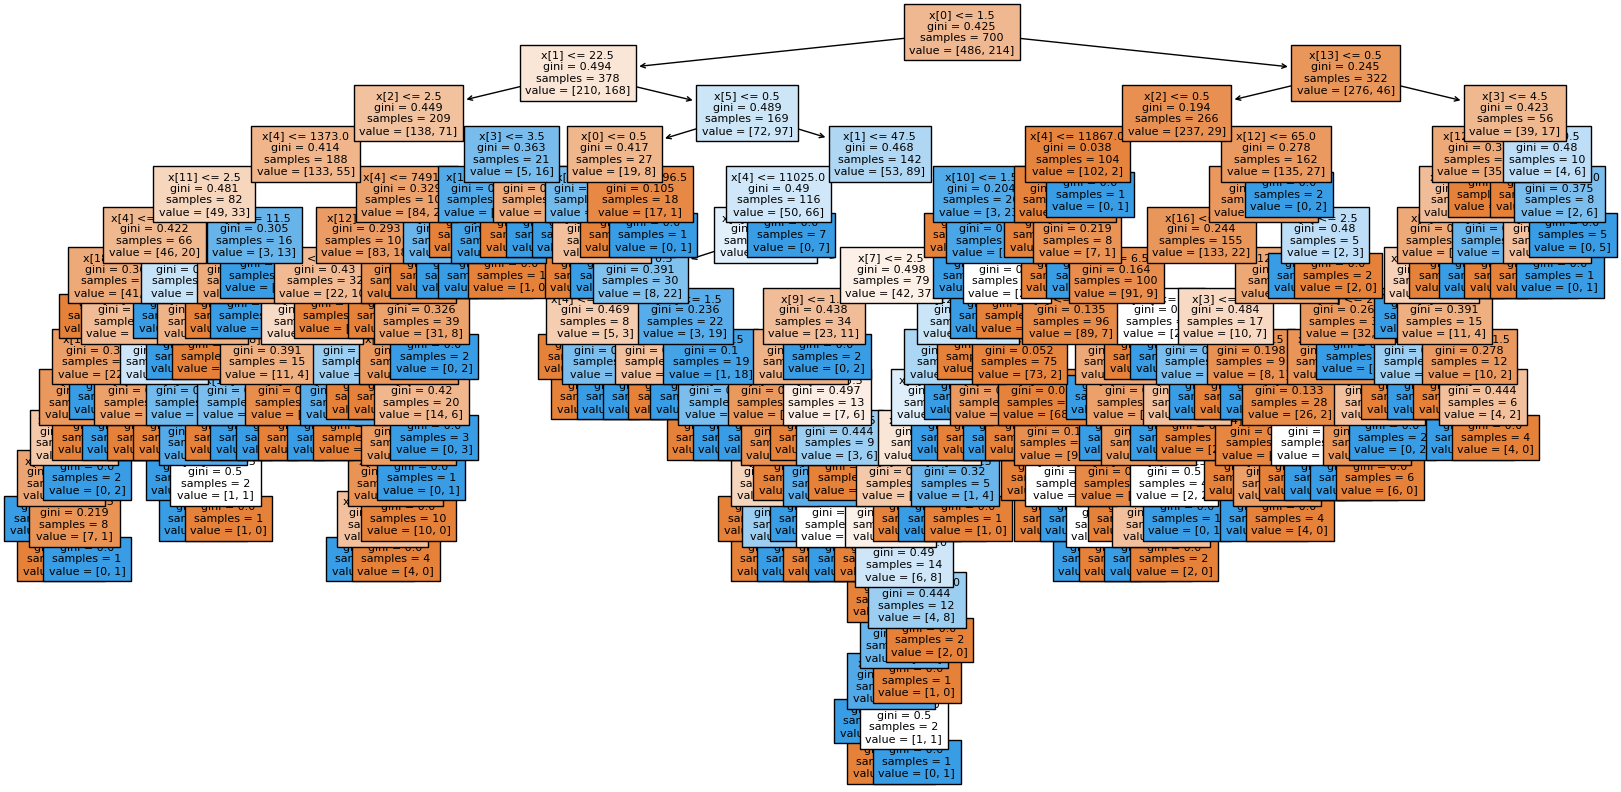

In [21]:
# 画Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
plot_tree(credit_model_cart, filled=True, fontsize=8)

[Text(0.5649054276315789, 0.9705882352941176, 'x[0] <= 1.5\nentropy = 0.888\nsamples = 700\nvalue = [486, 214]'),
 Text(0.3104029605263158, 0.9117647058823529, 'x[1] <= 22.5\nentropy = 0.991\nsamples = 378\nvalue = [210, 168]'),
 Text(0.2080592105263158, 0.8529411764705882, 'x[2] <= 2.5\nentropy = 0.925\nsamples = 209\nvalue = [138, 71]'),
 Text(0.1319078947368421, 0.7941176470588235, 'x[2] <= 0.5\nentropy = 0.872\nsamples = 188\nvalue = [133, 55]'),
 Text(0.07236842105263158, 0.7352941176470589, 'x[9] <= 0.5\nentropy = 0.551\nsamples = 47\nvalue = [41, 6]'),
 Text(0.05131578947368421, 0.6764705882352942, 'x[4] <= 908.0\nentropy = 0.286\nsamples = 40\nvalue = [38, 2]'),
 Text(0.04078947368421053, 0.6176470588235294, 'x[12] <= 36.5\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(0.030263157894736843, 0.5588235294117647, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.05131578947368421, 0.5588235294117647, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.0618421052631

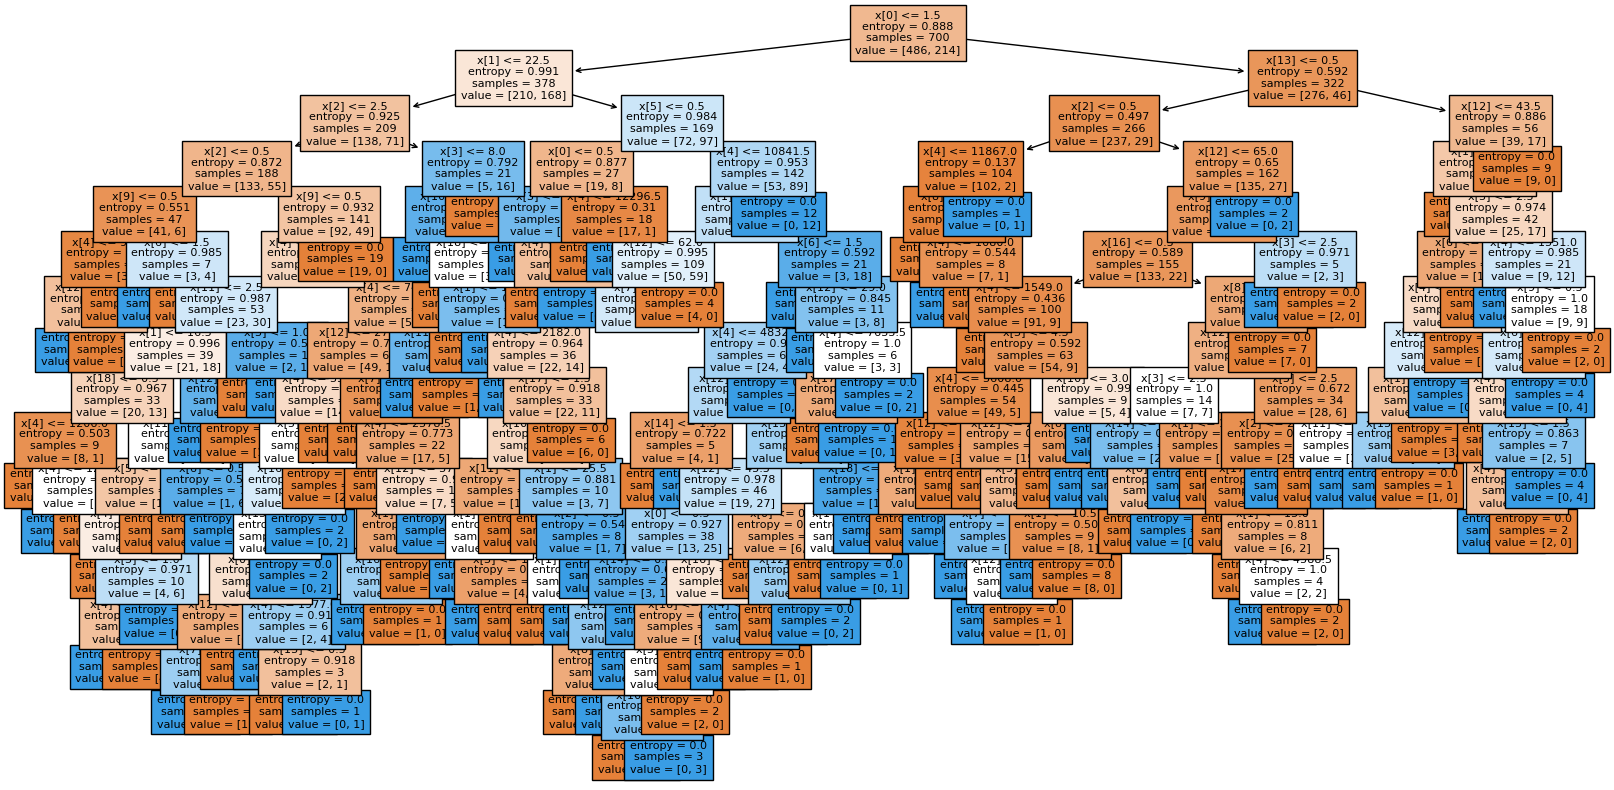

In [22]:
# 画Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
plot_tree(credit_model_id3, filled=True, fontsize=8)

### Tree Pruning

[Text(0.546875, 0.9166666666666666, 'x[0] <= 1.5\ngini = 0.425\nsamples = 700\nvalue = [486, 214]'),
 Text(0.275, 0.75, 'x[1] <= 22.5\ngini = 0.494\nsamples = 378\nvalue = [210, 168]'),
 Text(0.1625, 0.5833333333333334, 'x[2] <= 2.5\ngini = 0.449\nsamples = 209\nvalue = [138, 71]'),
 Text(0.1, 0.4166666666666667, 'x[4] <= 1373.0\ngini = 0.414\nsamples = 188\nvalue = [133, 55]'),
 Text(0.05, 0.25, 'x[11] <= 2.5\ngini = 0.481\nsamples = 82\nvalue = [49, 33]'),
 Text(0.025, 0.08333333333333333, 'gini = 0.422\nsamples = 66\nvalue = [46, 20]'),
 Text(0.075, 0.08333333333333333, 'gini = 0.305\nsamples = 16\nvalue = [3, 13]'),
 Text(0.15, 0.25, 'x[6] <= 0.5\ngini = 0.329\nsamples = 106\nvalue = [84, 22]'),
 Text(0.125, 0.08333333333333333, 'gini = 0.484\nsamples = 17\nvalue = [10, 7]'),
 Text(0.175, 0.08333333333333333, 'gini = 0.28\nsamples = 89\nvalue = [74, 15]'),
 Text(0.225, 0.4166666666666667, 'x[12] <= 30.0\ngini = 0.363\nsamples = 21\nvalue = [5, 16]'),
 Text(0.2, 0.25, 'gini = 0.165\

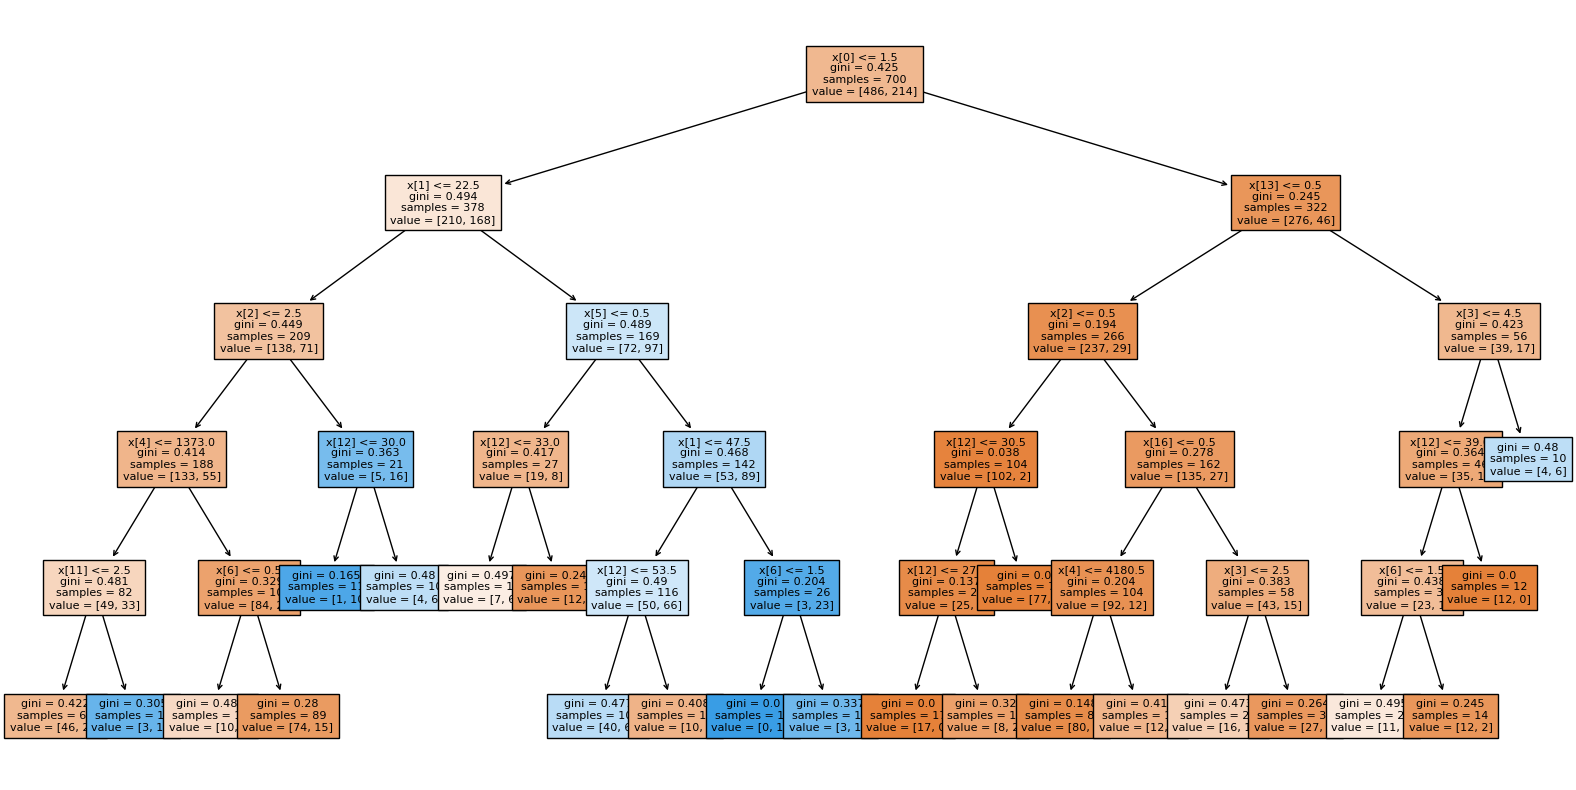

In [23]:
# 预剪枝
credit_model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=10)
credit_model.fit(train_x, train_y)
plt.figure(figsize=(20,10))
plot_tree(credit_model, filled=True, fontsize=8)

In [24]:
# 后剪枝
credit_model = DecisionTreeClassifier(criterion='gini')
path = credit_model.cost_complexity_pruning_path(train_x, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.        , 0.00093858, 0.00122449, 0.00125   , 0.00126984,
       0.00133333, 0.00135338, 0.00137308, 0.0014147 , 0.00142857,
       0.00169424, 0.00176871, 0.00183315, 0.00190476, 0.00190476,
       0.00190476, 0.00190476, 0.00190476, 0.00194444, 0.00203175,
       0.00209541, 0.00214286, 0.00214286, 0.00214286, 0.00214286,
       0.00215873, 0.00222222, 0.00228249, 0.00228571, 0.00228571,
       0.00228571, 0.00228571, 0.00235294, 0.00238095, 0.00238095,
       0.00239859, 0.00240602, 0.00242917, 0.0024381 , 0.00244898,
       0.00252101, 0.00252747, 0.00253968, 0.00253968, 0.00257143,
       0.0025974 , 0.00269841, 0.00277499, 0.00279107, 0.00289837,
       0.00306576, 0.00309133, 0.00311278, 0.00316619, 0.00321429,
       0.00326054, 0.00338246, 0.00369948, 0.00387526, 0.0039736 ,
       0.0039758 , 0.00400216, 0.00415818, 0.00482143, 0.00500269,
       0.00526252, 0.00604625, 0.00728388, 0.00801019, 0.01188938,
       0.01465002, 0.04518639])

In [25]:
model_trees = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(criterion='gini', ccp_alpha=ccp_alpha)
    model.fit(train_x, train_y)
    model_trees.append(model)
model_trees

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.0009385783298826777),
 DecisionTreeClassifier(ccp_alpha=0.0012244897959183675),
 DecisionTreeClassifier(ccp_alpha=0.00125),
 DecisionTreeClassifier(ccp_alpha=0.0012698412698412698),
 DecisionTreeClassifier(ccp_alpha=0.0013333333333333337),
 DecisionTreeClassifier(ccp_alpha=0.0013533834586466173),
 DecisionTreeClassifier(ccp_alpha=0.0013730848861283657),
 DecisionTreeClassifier(ccp_alpha=0.0014147018030513194),
 DecisionTreeClassifier(ccp_alpha=0.0014285714285714286),
 DecisionTreeClassifier(ccp_alpha=0.0016942355889724313),
 DecisionTreeClassifier(ccp_alpha=0.0017687074829931977),
 DecisionTreeClassifier(ccp_alpha=0.001833154314357321),
 DecisionTreeClassifier(ccp_alpha=0.0019047619047619048),
 DecisionTreeClassifier(ccp_alpha=0.0019047619047619048),
 DecisionTreeClassifier(ccp_alpha=0.0019047619047619048),
 DecisionTreeClassifier(ccp_alpha=0.0019047619047619048),
 DecisionTreeClassifier(ccp_alpha=0.0019047619047619048),
 D

In [26]:
train_scores = [model.score(train_x, train_y) for model in model_trees]
test_scores = [model.score(test_x, test_y) for model in model_trees]

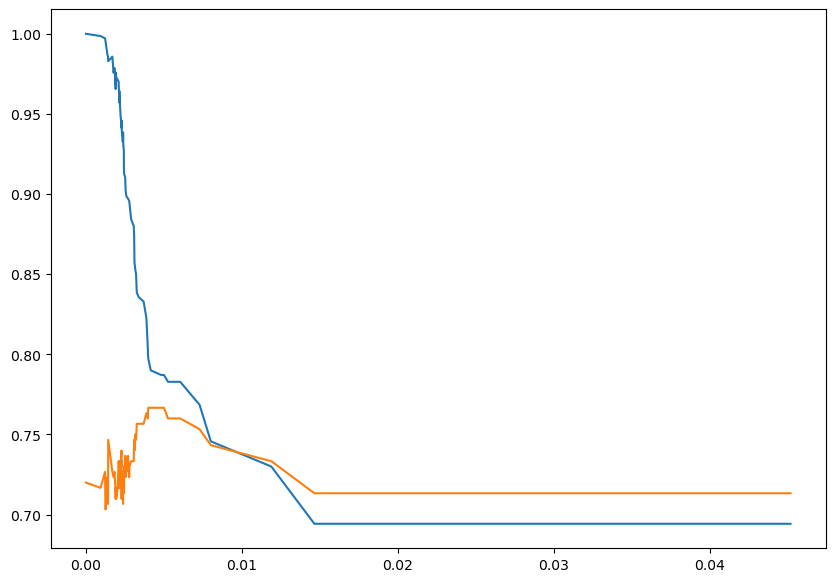

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
ax.set_label('alpha')
ax.plot(ccp_alphas, train_scores, label = 'train_x')
ax.plot(ccp_alphas, test_scores, label = 'test_x')


[Text(0.5555555555555556, 0.875, 'x[0] <= 1.5\nentropy = 0.888\nsamples = 700\nvalue = [486, 214]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 22.5\nentropy = 0.991\nsamples = 378\nvalue = [210, 168]'),
 Text(0.2222222222222222, 0.375, 'x[2] <= 2.5\nentropy = 0.925\nsamples = 209\nvalue = [138, 71]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.872\nsamples = 188\nvalue = [133, 55]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.792\nsamples = 21\nvalue = [5, 16]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.984\nsamples = 169\nvalue = [72, 97]'),
 Text(0.7777777777777778, 0.625, 'x[13] <= 0.5\nentropy = 0.592\nsamples = 322\nvalue = [276, 46]'),
 Text(0.6666666666666666, 0.375, 'x[2] <= 0.5\nentropy = 0.497\nsamples = 266\nvalue = [237, 29]'),
 Text(0.5555555555555556, 0.125, 'entropy = 0.137\nsamples = 104\nvalue = [102, 2]'),
 Text(0.7777777777777778, 0.125, 'entropy = 0.65\nsamples = 162\nvalue = [135, 27]'),
 Text(0.8888888888888888, 0.375, 'entropy = 0.886\nsamples = 56\nva

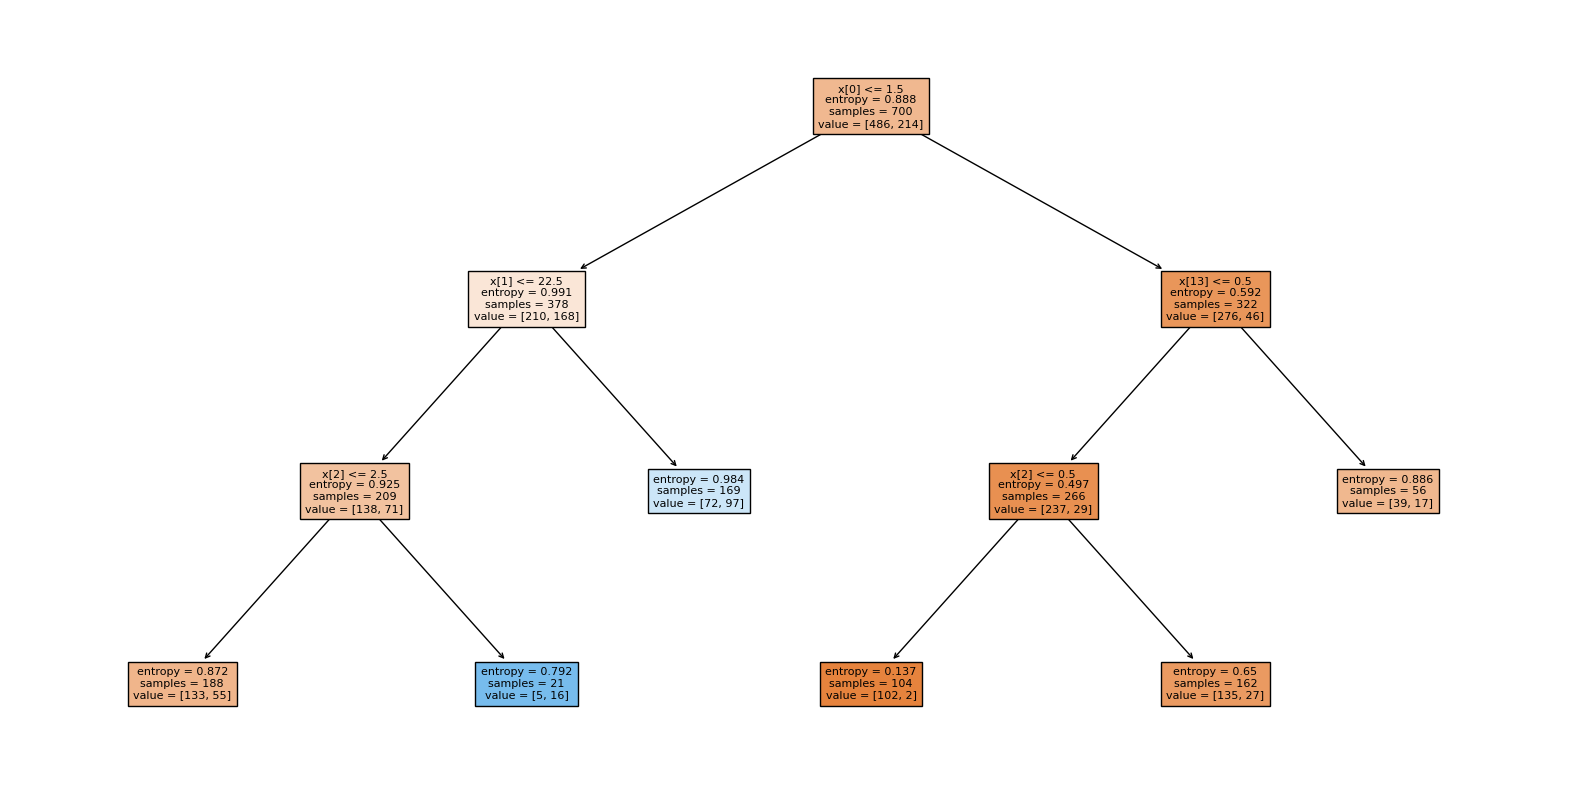

In [28]:
credit_model = DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.015)
credit_model.fit(train_x, train_y)
plt.figure(figsize=(20,10))
plot_tree(credit_model, filled=True, fontsize=8)

## Naive Bayes


In [1]:
import pandas as pd
sms_raw = pd.read_csv('./sms_spam.csv',encoding='gbk')
sms_raw.head()


,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
sms_raw.describe()
# preprocessing
sms_raw['type_number'], sms_raw_label = sms_raw['type'].factorize()


In [3]:
text = sms_raw.text.iloc[2]
text

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [4]:
import string
string.punctuation # 提供一些符号

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
# 我们需要清理掉特殊符号和数字以进行下一步处理（词向量）
help(str.maketrans)
def removePunctuation(text):
    maker = str.maketrans('','',string.punctuation + string.digits)
    new_text = text.translate(maker).lower()
    return new_text
sms_raw['text_new'] = sms_raw['text'].map(removePunctuation)
sms_raw.head()

Help on built-in function maketrans:

maketrans(...)
    Return a translation table usable for str.translate().
    
    If there is only one argument, it must be a dictionary mapping Unicode
    ordinals (integers) or characters to Unicode ordinals, strings or None.
    Character keys will be then converted to ordinals.
    If there are two arguments, they must be strings of equal length, and
    in the resulting dictionary, each character in x will be mapped to the
    character at the same position in y. If there is a third argument, it
    must be a string, whose characters will be mapped to None in the result.



,type,text,type_number,text_new
0,ham,"Go until jurong point, crazy.. Available only ...",0,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,0,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah i dont think he goes to usf he lives aroun...


In [6]:
#某一个样本举例
text = [
    'apple apple the the a a',
     'red red red red red red',
     'one one one one one one flower two two two',
     'allall allall red'
]
from sklearn.feature_extraction.text import CountVectorizer
model = CountVectorizer(stop_words = 'english', min_df = 100, decode_error = 'ignore')

sms_counts = model.fit_transform(sms_raw['text_new'])
sms_counts.toarray(), model.get_feature_names_out()

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array(['claim', 'come', 'da', 'day', 'dear', 'did', 'dont', 'free',
        'going', 'good', 'got', 'great', 'hey', 'hi', 'home', 'hope',
        'ill', 'im', 'just', 'know', 'later', 'like', 'lor', 'love',
        'ltgt', 'mobile', 'need', 'new', 'night', 'oh', 'ok', 'phone',
        'reply', 'send', 'sorry', 'stop', 'tell', 'text', 'think', 'time',
        'today', 'txt', 'ur', 'want', 'week'], dtype=object))

In [7]:
# 运用到所有的text
sms_raw_df = pd.DataFrame(sms_counts.toarray(), columns = model.get_feature_names_out())

sms_raw_df

,claim,come,da,day,dear,did,dont,free,going,good,...,stop,tell,text,think,time,today,txt,ur,want,week
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5562,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5563,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5565,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
# train text
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(sms_counts, sms_raw['type_number'])

In [9]:
from sklearn import naive_bayes
from sklearn import metrics
model_Gauss = naive_bayes.GaussianNB()
model_Mul = naive_bayes.MultinomialNB()

model_Ber = naive_bayes.BernoulliNB()

sms_classifier = model_Ber.fit(X_train, Y_train)
Y_predict = sms_classifier.predict(X_test)

metrics.confusion_matrix(Y_test, Y_predict)

array([[1174,   19],
       [  88,  111]], dtype=int64)

In [10]:
t = metrics.classification_report(Y_test, Y_predict)
print(t)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1193
           1       0.85      0.56      0.67       199

    accuracy                           0.92      1392
   macro avg       0.89      0.77      0.82      1392
weighted avg       0.92      0.92      0.92      1392



In [11]:

text = [
    'apple apple the the a a',
     'red red red red red red',
     'one one one one one one flower two two two',
     'allall allall red'
]
''.join(text)


'apple apple the the a ared red red red red redone one one one one one flower two two twoallall allall red'

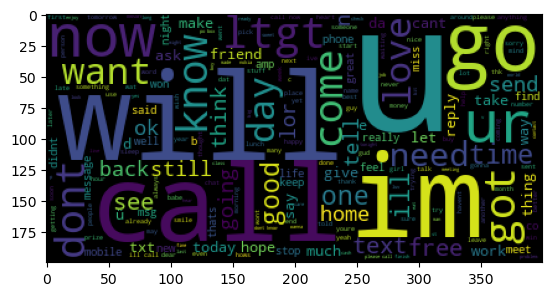

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ''.join(sms_raw['text_new'])
wc = WordCloud()
wc.generate(all_text)
plt.imshow(wc)
plt.show()

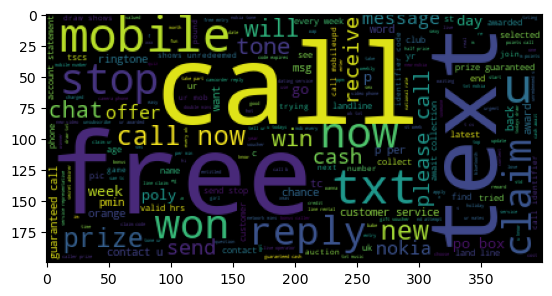

In [15]:
#诈骗邮件
all_text_ham = ''.join(sms_raw['text_new'][sms_raw['type_number']==1])
wc.generate(all_text_ham)
plt.imshow(wc)
plt.show()